In [3]:
boston_df = read.csv('/home/jovyan/Project3/data/bostonhousing.csv', header=FALSE, sep='')

colnames(boston_df) = c('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black','lstat', 'medv')

In [8]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(dplyr, warn.conflicts = FALSE)
library(moments)

In [10]:
stats = data.frame(feature=colnames(boston_df))
stats['mean_'] = sapply(boston_df, mean)
stats['sd_'] = sapply(boston_df, sd)
stats['skewness_'] = sapply(boston_df, skewness)
stats['kurtosis_'] = sapply(boston_df, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_
crim,3.61352356,8.6015451,5.2076524,39.752786
zn,11.36363636,23.3224530,2.2190631,6.979949
indus,11.13677866,6.8603529,0.2941463,1.766782
chas,0.06916996,0.2539940,3.3957993,12.531453
nox,0.55469506,0.1158777,0.7271442,2.924136
rm,6.28463439,0.7026171,0.4024147,4.861027
age,68.57490119,28.1488614,-0.5971856,2.029986
dis,3.79504269,2.1057101,1.0087788,3.471299
rad,9.54940711,8.7072594,1.0018335,2.129479
tax,408.23715415,168.5371161,0.6679683,1.857015


In [13]:
library(ggplot2)

In [14]:
feature <- function (feature) {
    original_feature <- as.vector(boston_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=100, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))  
    plot(p1)
}

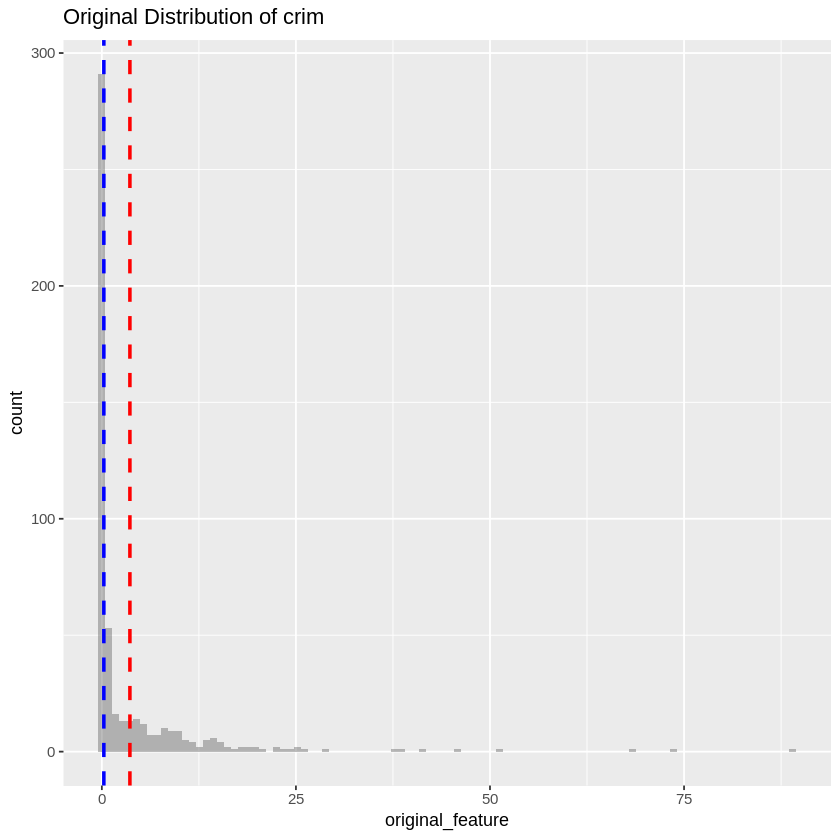

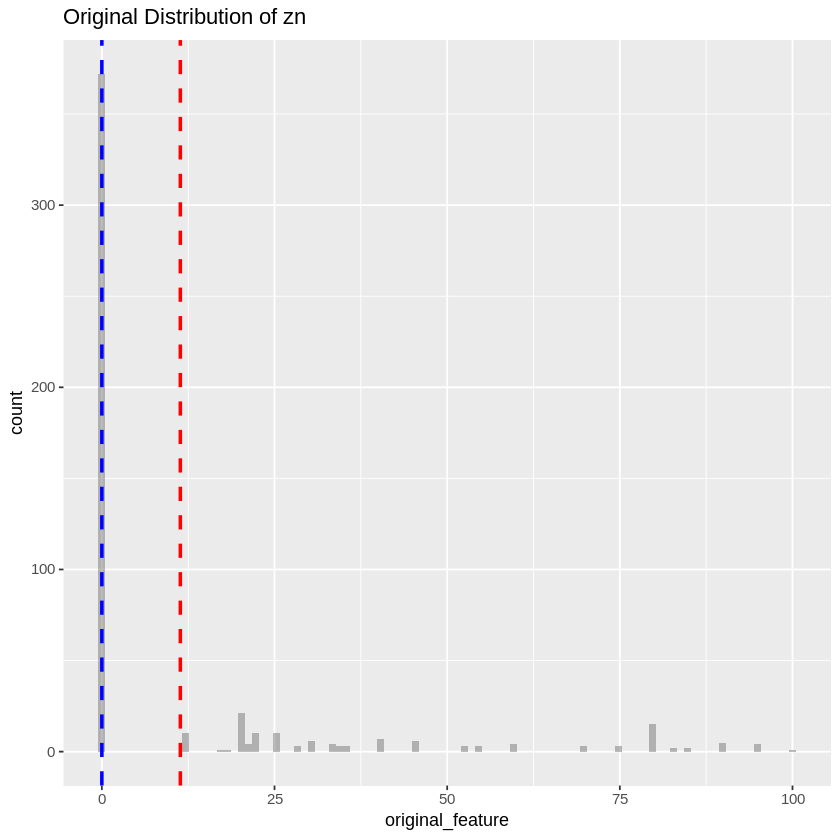

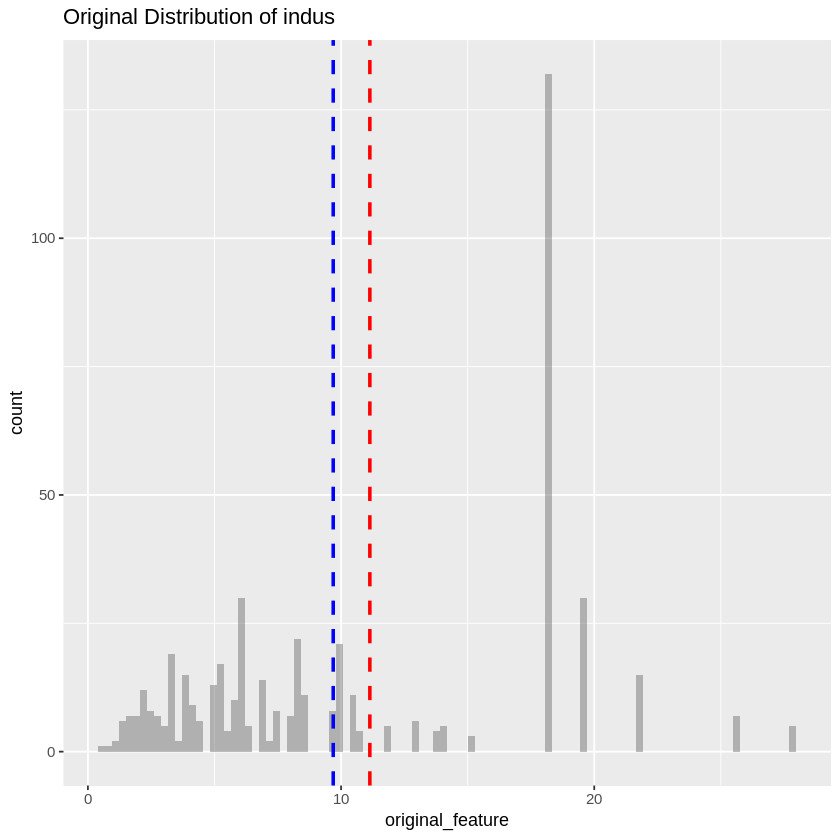

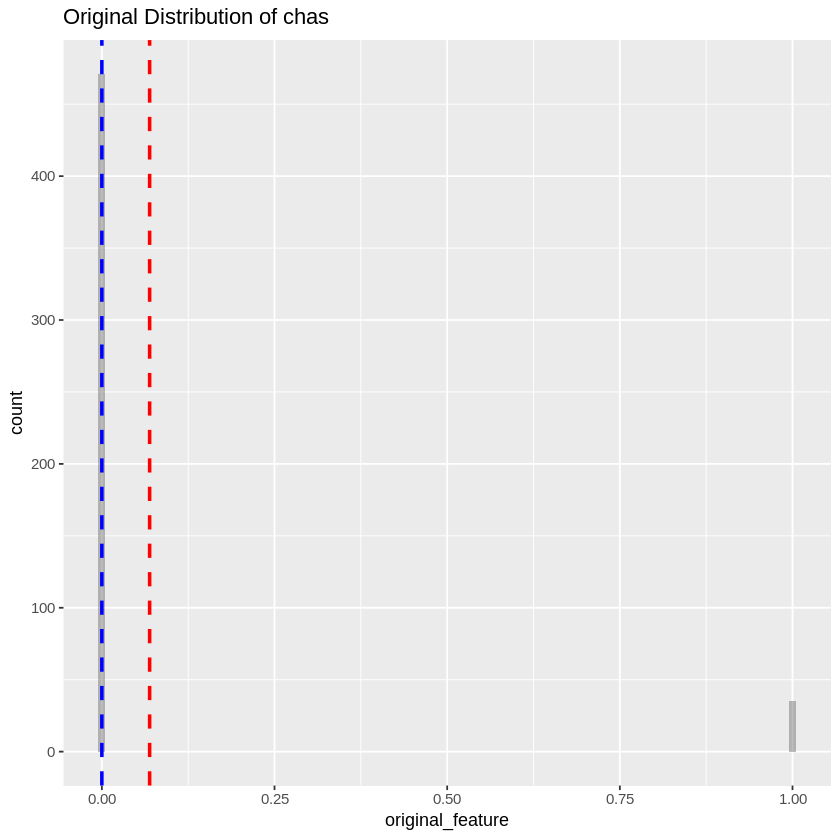

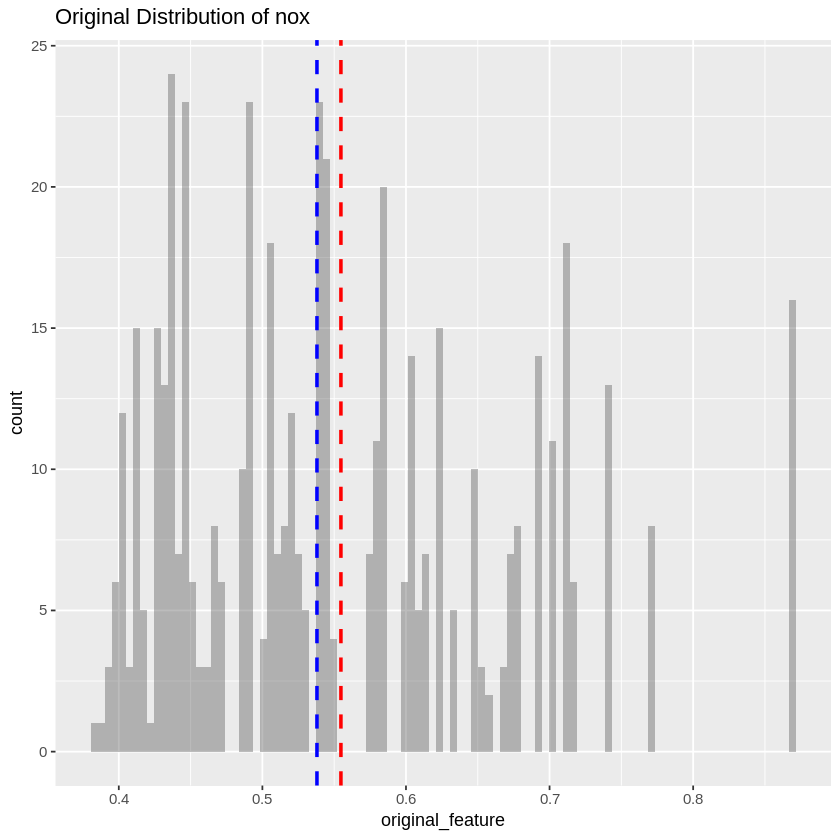

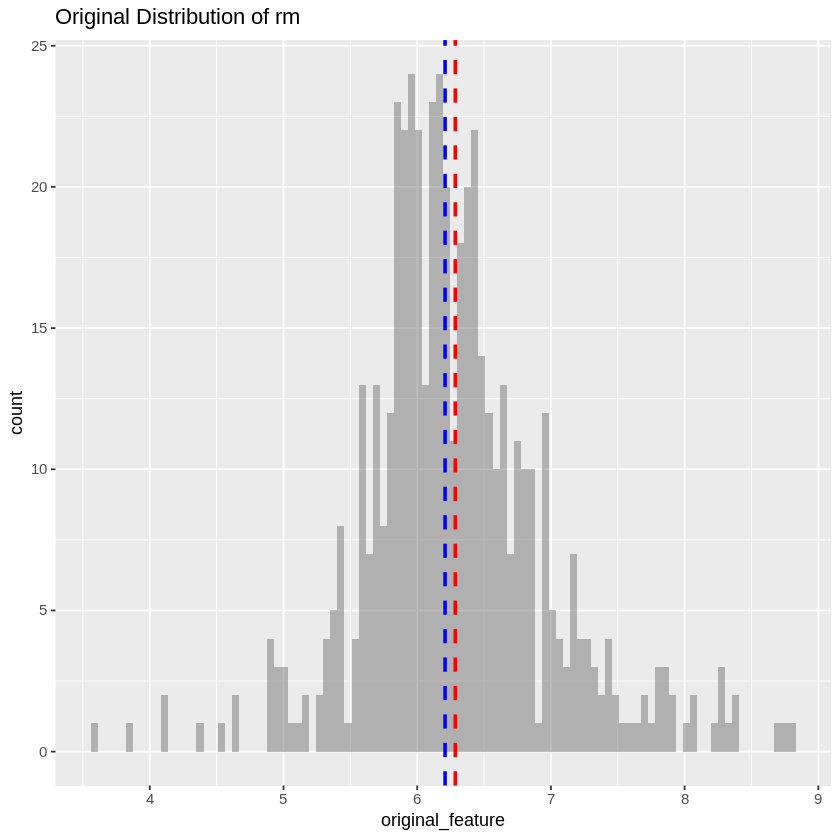

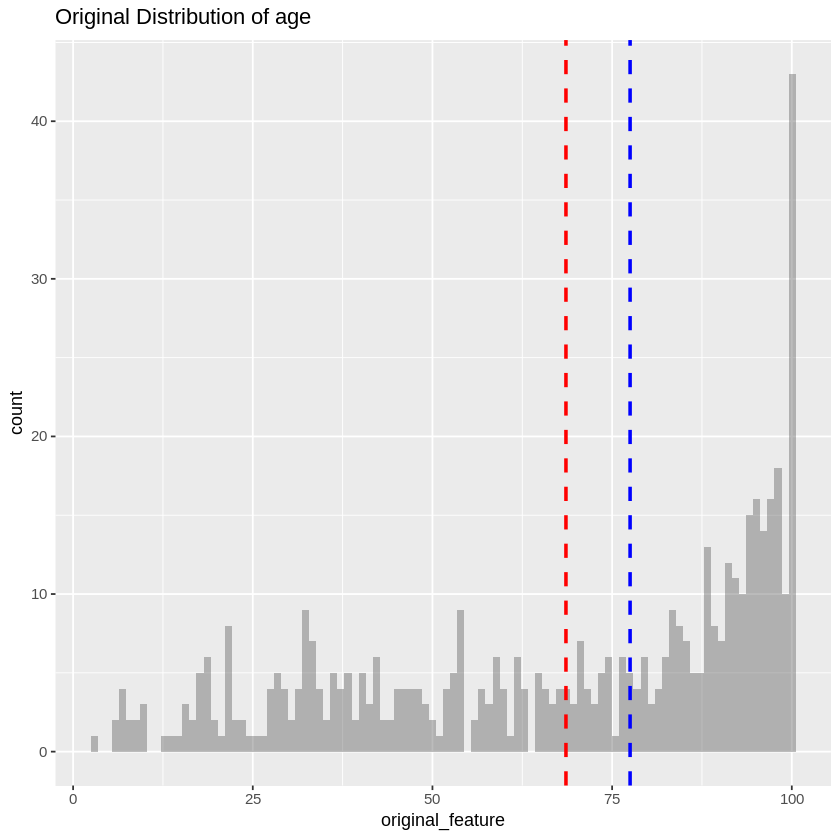

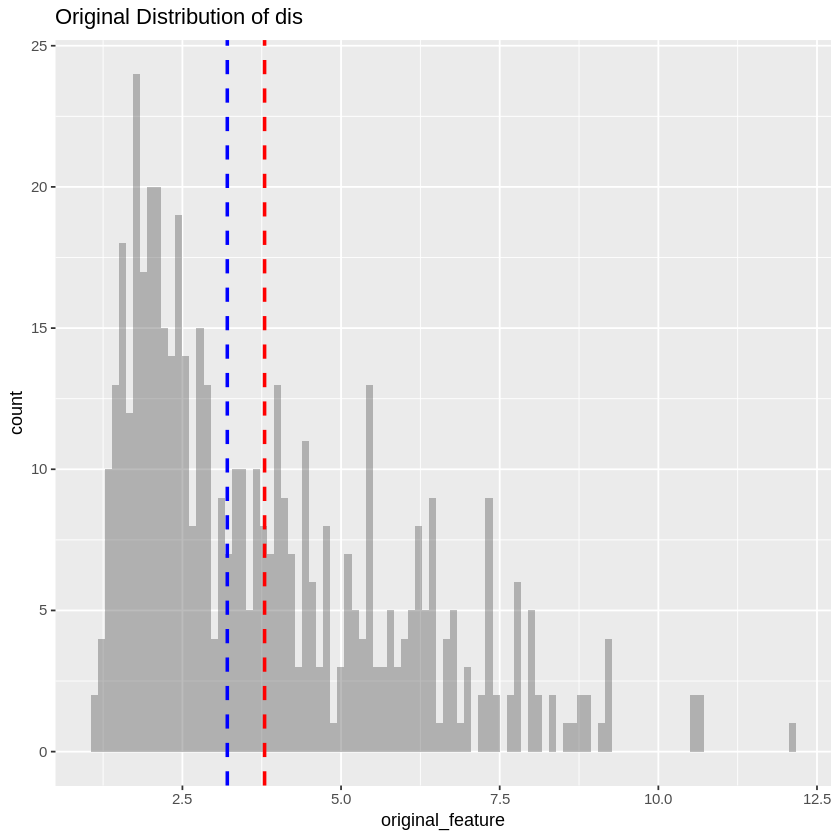

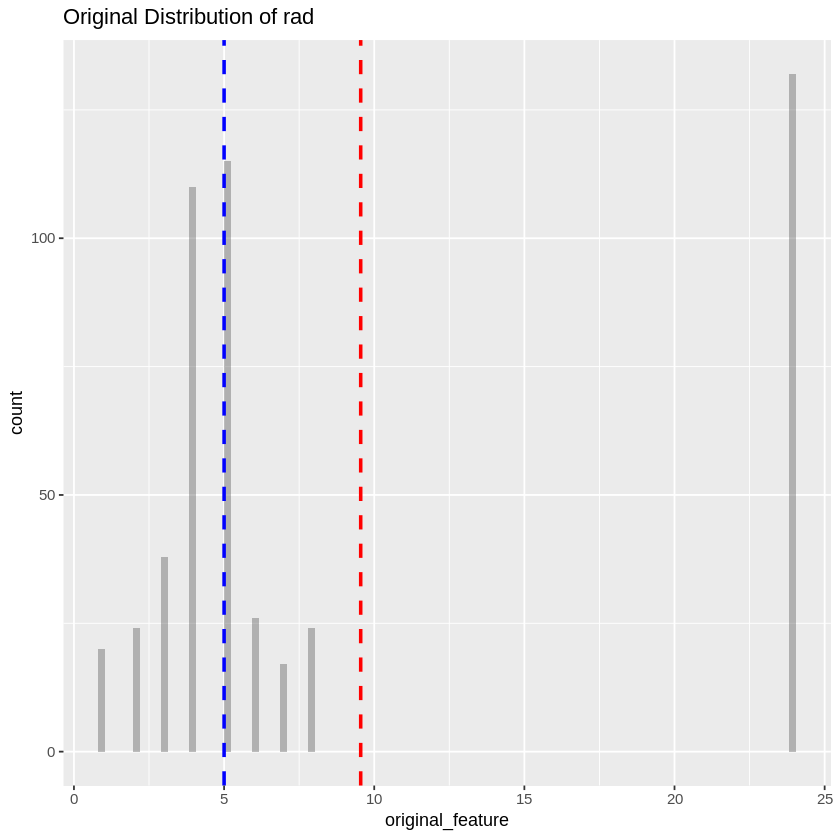

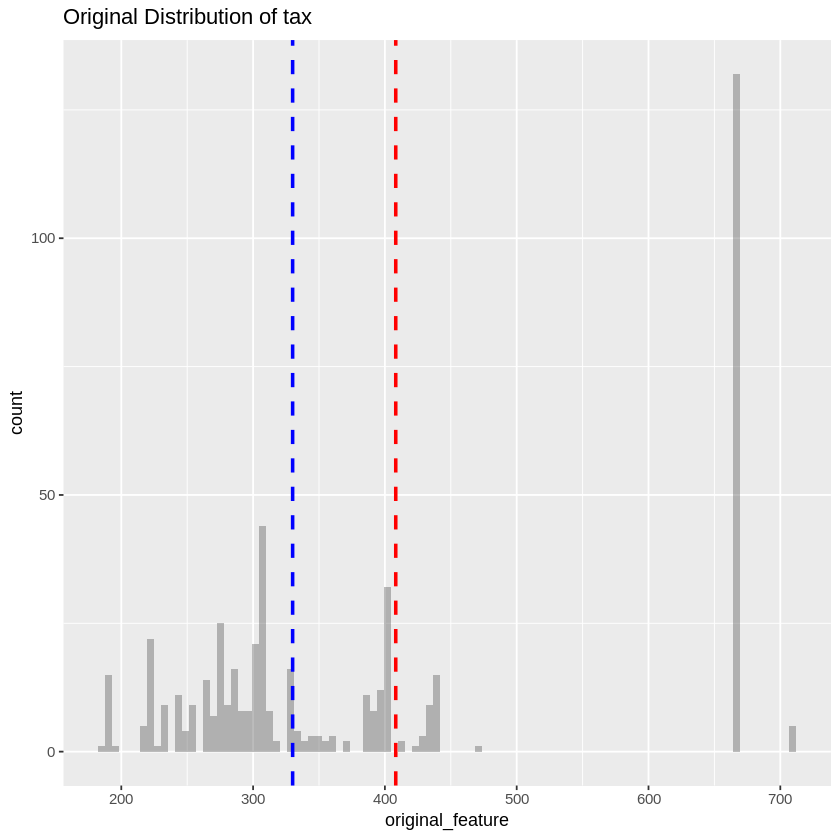

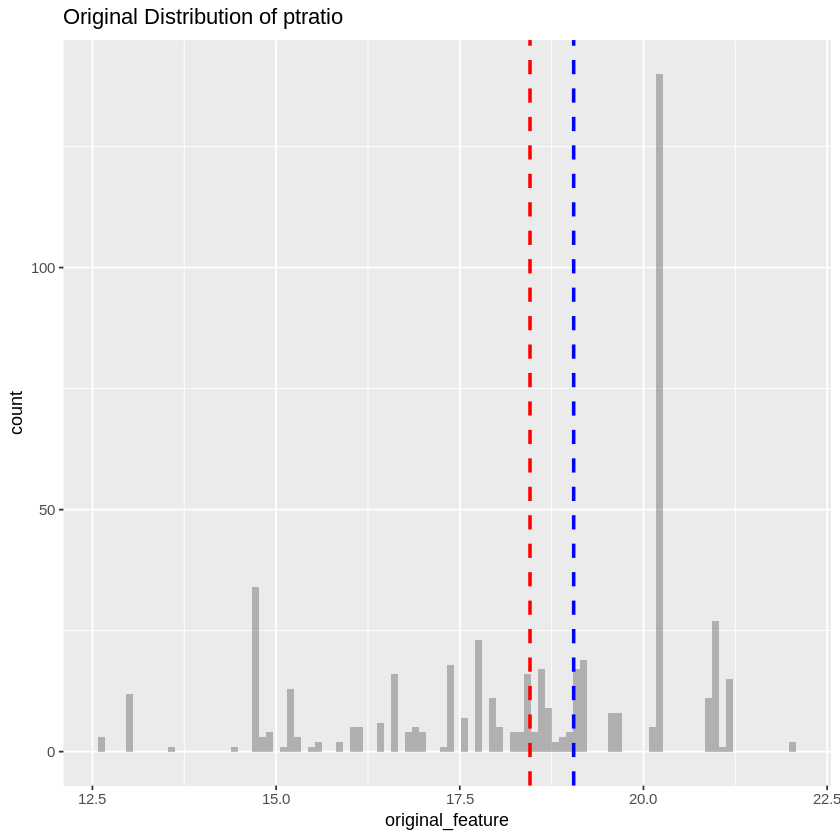

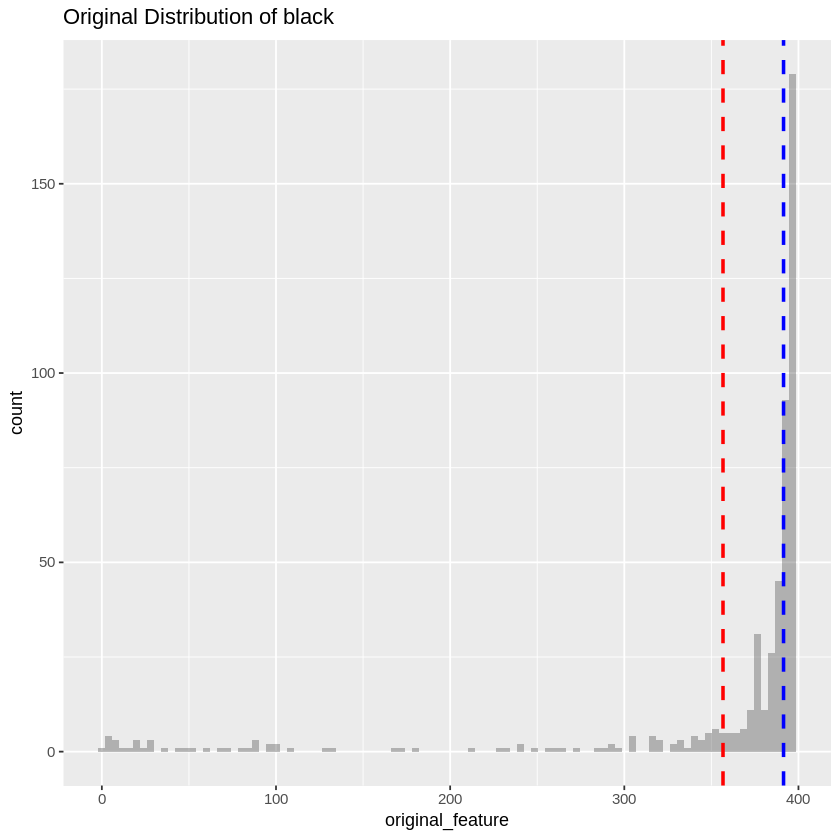

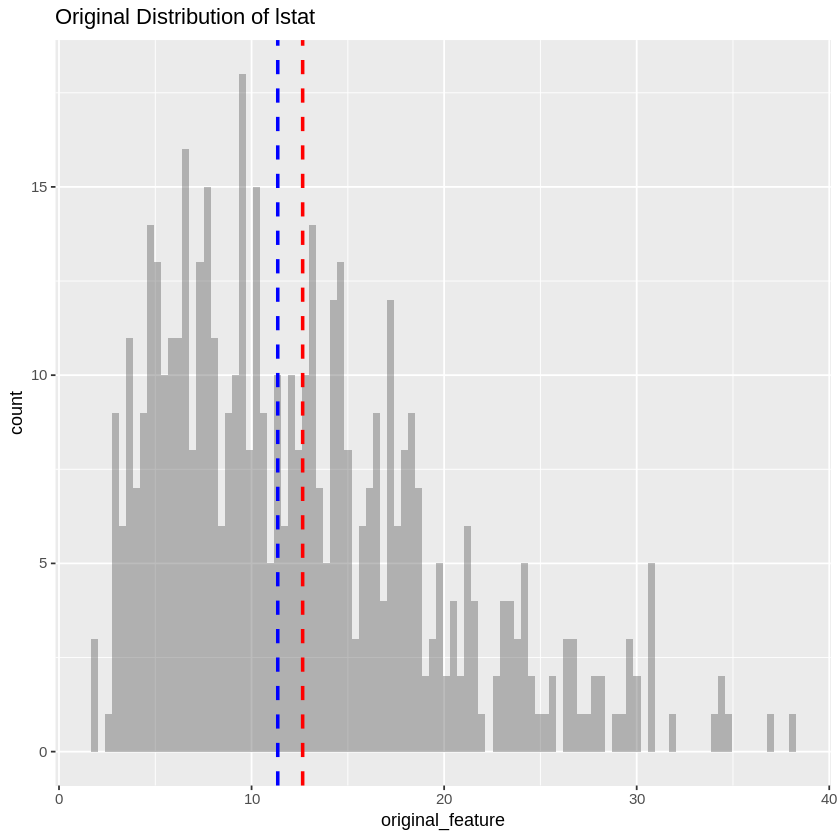

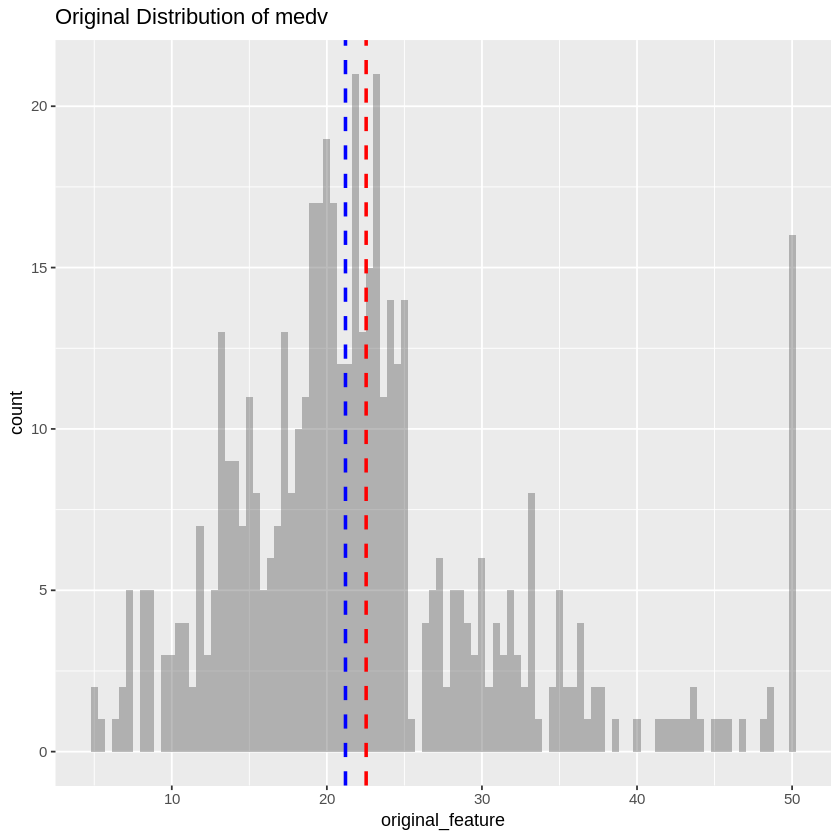

In [15]:
feature('crim')
feature('zn')
feature('indus')
feature('chas')
feature('nox')
feature('rm')
feature('age')
feature('dis')
feature('rad')
feature('tax')
feature('ptratio')
feature('black')
feature('lstat')
feature('medv')

In the above plots we can see the median (blue) and the mean (red). If the mean is to the right of the median - menaing the value is higher - we know the data set skews positive. If the mean is to the left of the median the dataset skews negative.

# Normalizing the data

In [17]:
library(repr)
options(repr.plot.width=6, repr.plot.height=3) 

In [18]:
source('multiplot.r')

In [19]:
boston_sc_df = data.frame(scale(boston_df))

In [20]:
original_v_scaled <- function (feature) {
    original_feature <- as.vector(boston_df[[feature]])
    scaled_feature <- as.vector(boston_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}


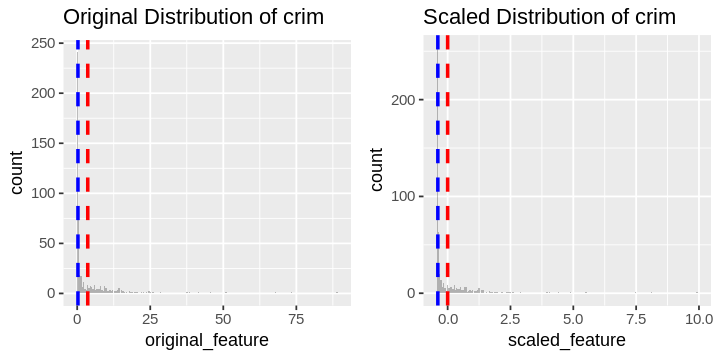

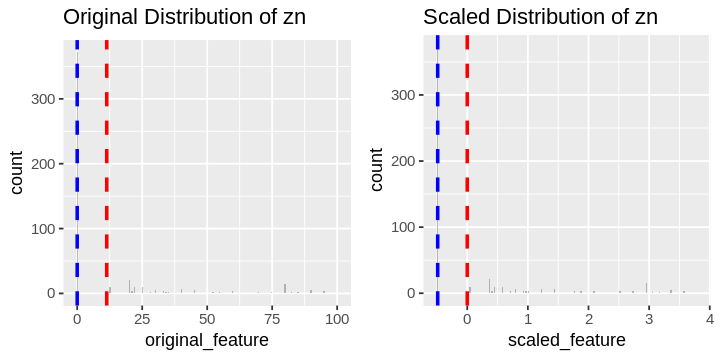

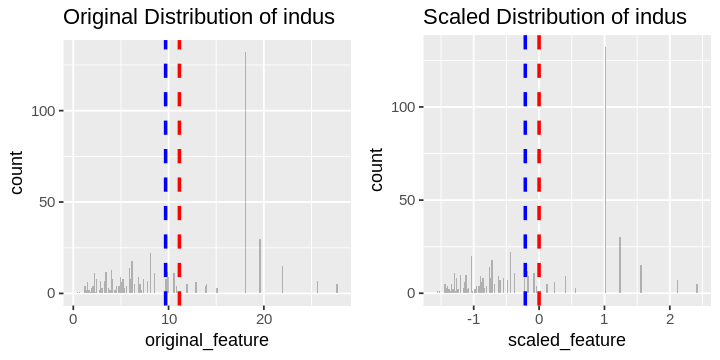

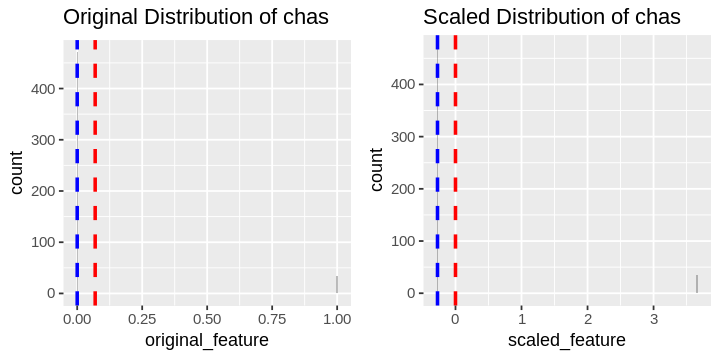

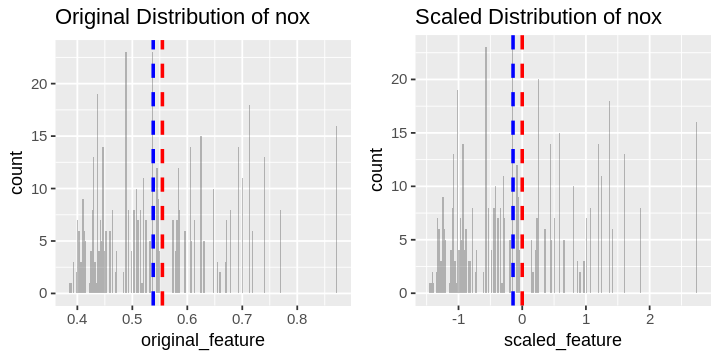

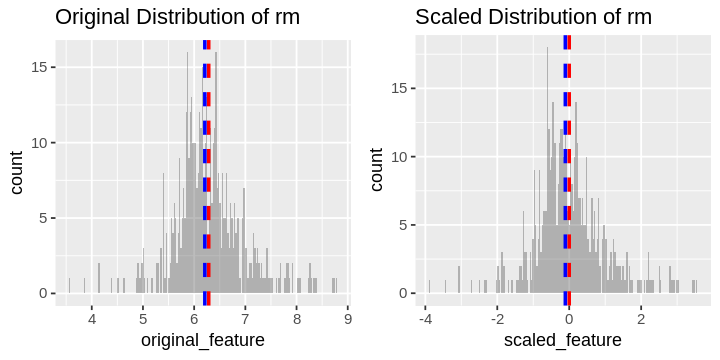

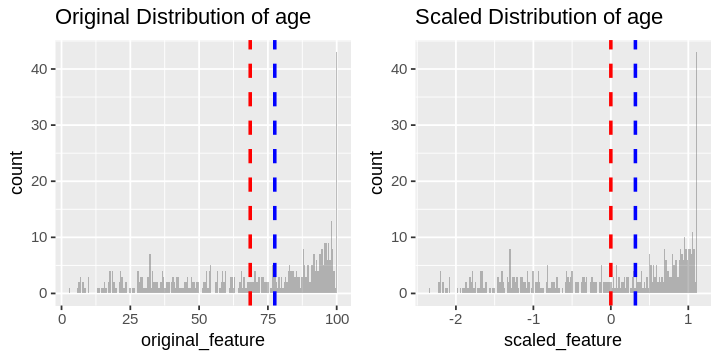

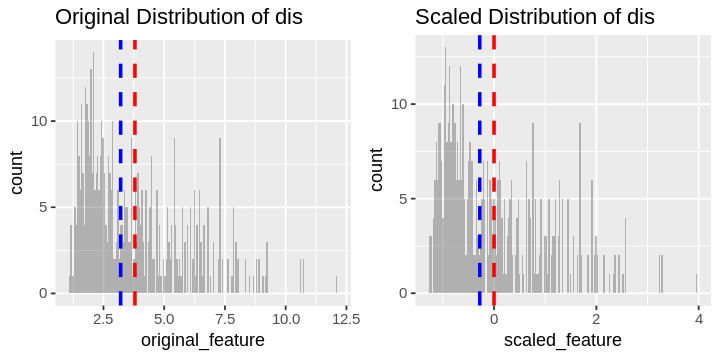

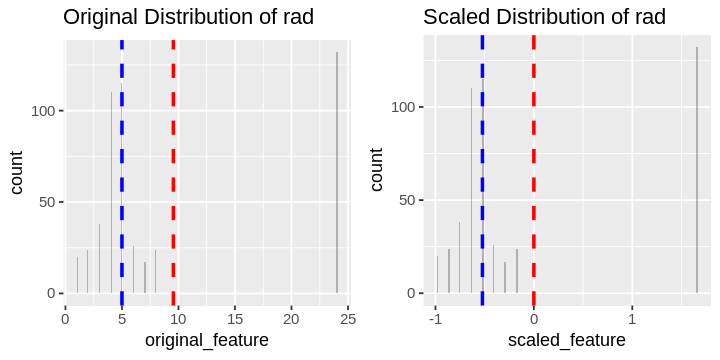

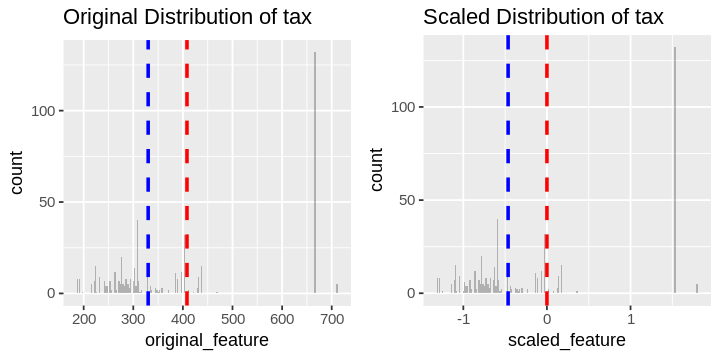

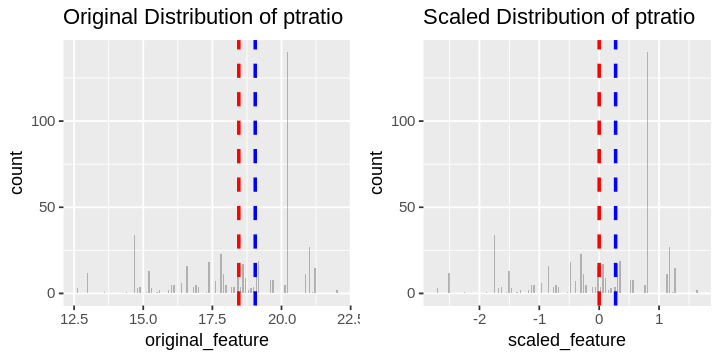

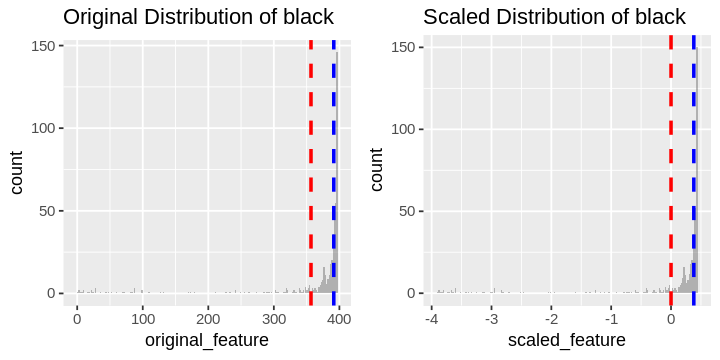

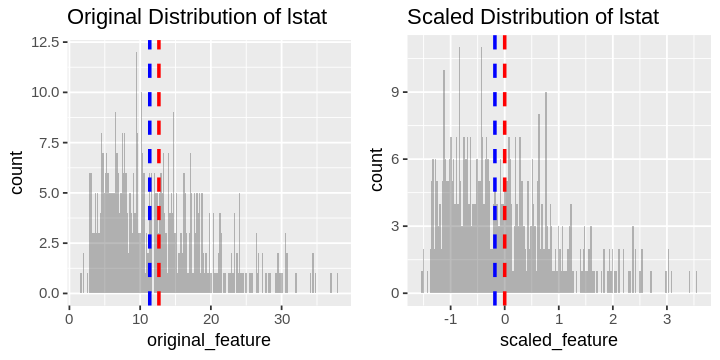

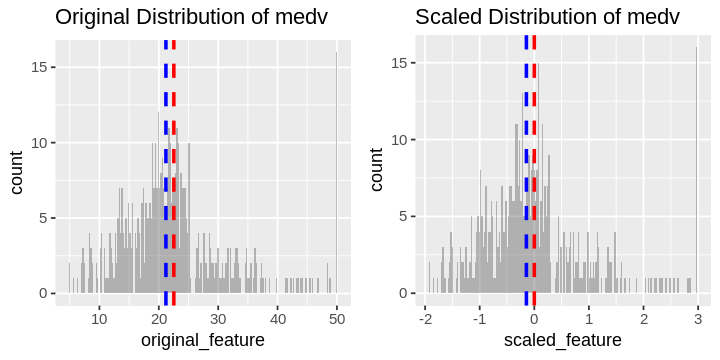

In [21]:
original_v_scaled('crim')
original_v_scaled('zn')
original_v_scaled('indus')
original_v_scaled('chas')
original_v_scaled('nox')
original_v_scaled('rm')
original_v_scaled('age')
original_v_scaled('dis')
original_v_scaled('rad')
original_v_scaled('tax')
original_v_scaled('ptratio')
original_v_scaled('black')
original_v_scaled('lstat')
original_v_scaled('medv')

In the above plots the mean was set to 0 for the standardized features while the median remains in the same relationship to the mean.

# Applying a log transformation the data

In [22]:
boston_log_df = log(boston_df)
boston_log_sc_df = data.frame(scale(boston_log_df))

In [23]:
skewness_ = data.frame(feature=colnames(boston_sc_df))
skewness_['skew_'] = sapply(boston_df, skewness)
skewness_['skew_sc'] = sapply(boston_sc_df, skewness)
skewness_

feature,skew_,skew_sc
crim,5.2076524,5.2076524
zn,2.2190631,2.2190631
indus,0.2941463,0.2941463
chas,3.3957993,3.3957993
nox,0.7271442,0.7271442
rm,0.4024147,0.4024147
age,-0.5971856,-0.5971856
dis,1.0087788,1.0087788
rad,1.0018335,1.0018335
tax,0.6679683,0.6679683


In [27]:
skewness_['skew_log_'] = sapply(boston_log_df, skewness)
skewness_['skew_log_sc'] = sapply(boston_log_sc_df, skewness)
skewness_

feature,skew_,skew_sc,skew_log_,skew_log_sc
crim,5.2076524,5.2076524,0.4047301,0.4047301
zn,2.2190631,2.2190631,NaN,NaN
indus,0.2941463,0.2941463,-0.6412176,-0.6412176
chas,3.3957993,3.3957993,NaN,NaN
nox,0.7271442,0.7271442,0.3567181,0.3567181
rm,0.4024147,0.4024147,-0.2937892,-0.2937892
age,-0.5971856,-0.5971856,-1.6706836,-1.6706836
dis,1.0087788,1.0087788,0.1522770,0.1522770
rad,1.0018335,1.0018335,0.2857667,0.2857667
tax,0.6679683,0.6679683,0.3295759,0.3295759


In [28]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(boston_df[[feature]])
    scaled_feature <- as.vector(boston_sc_df[[feature]])
    log_feature <- as.vector(boston_log_df[[feature]])
    log_scaled_feature <- as.vector(boston_log_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}


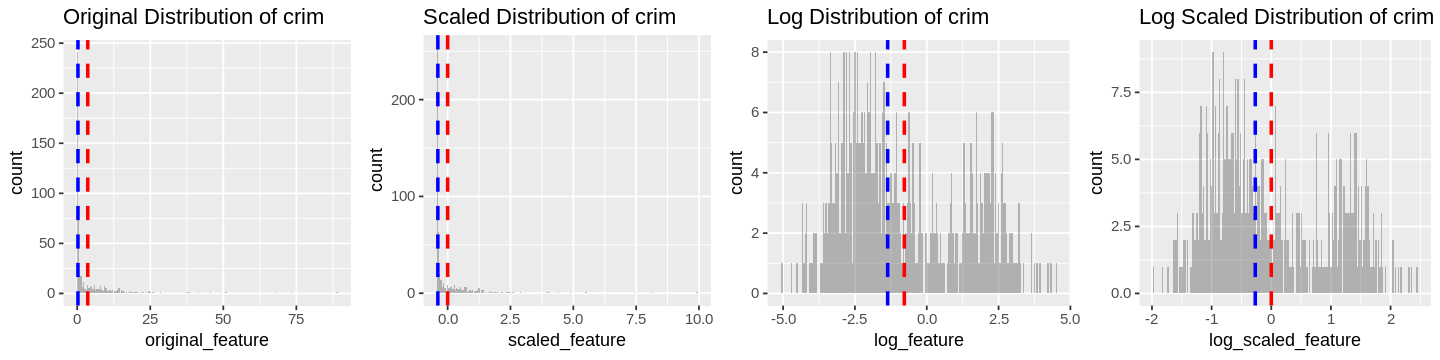

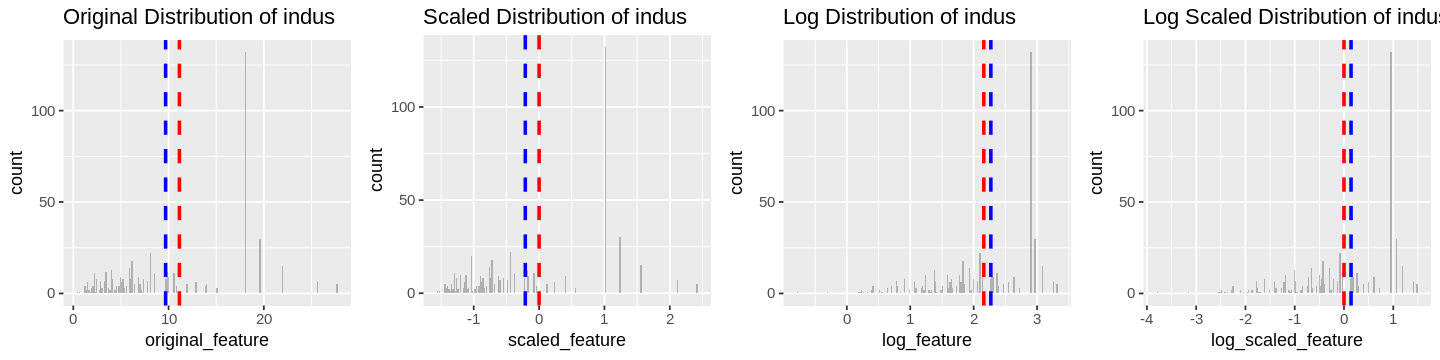

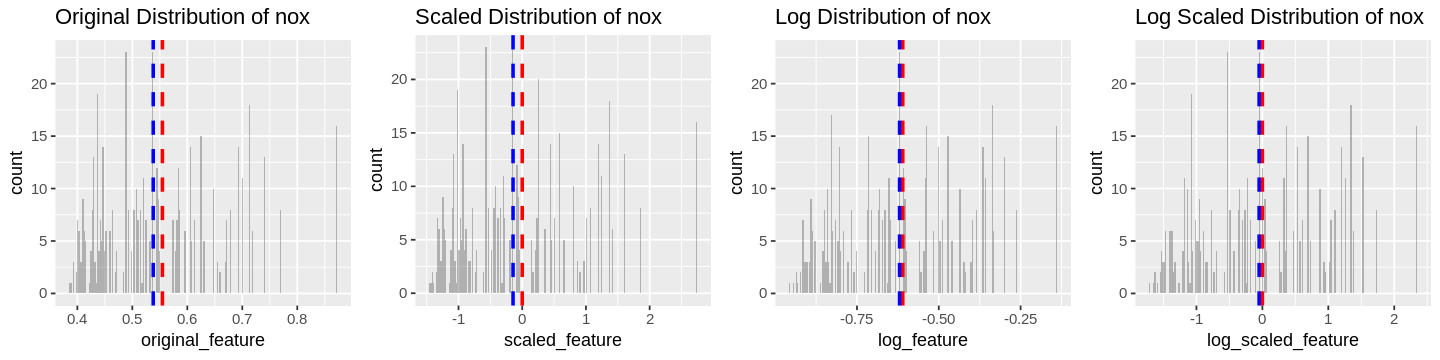

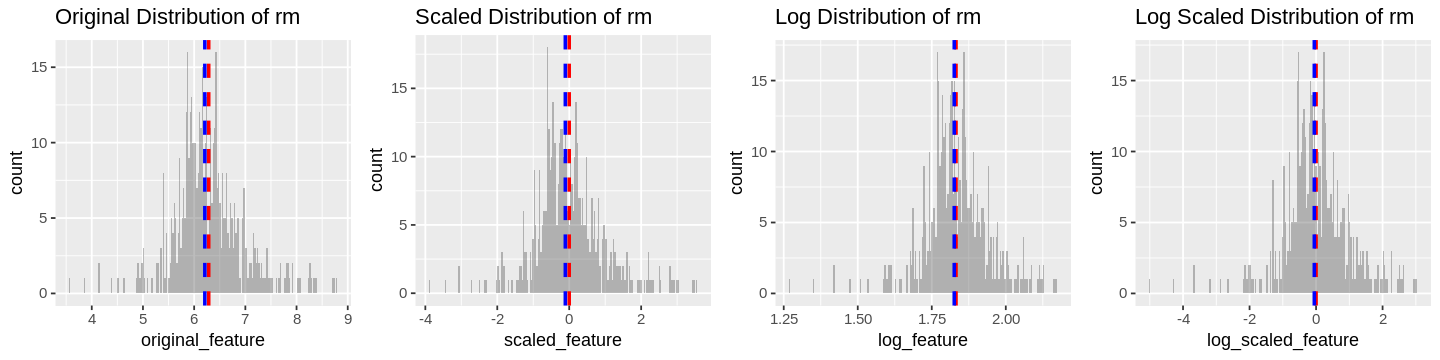

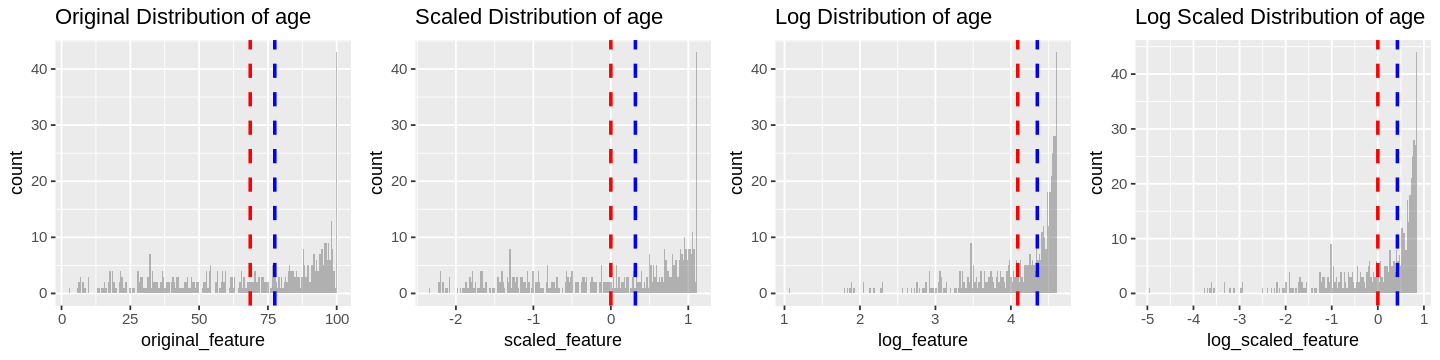

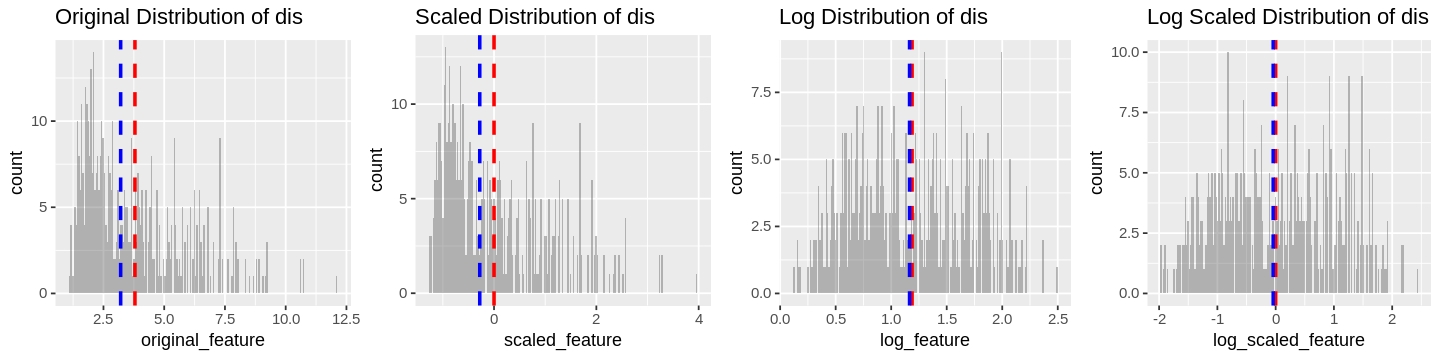

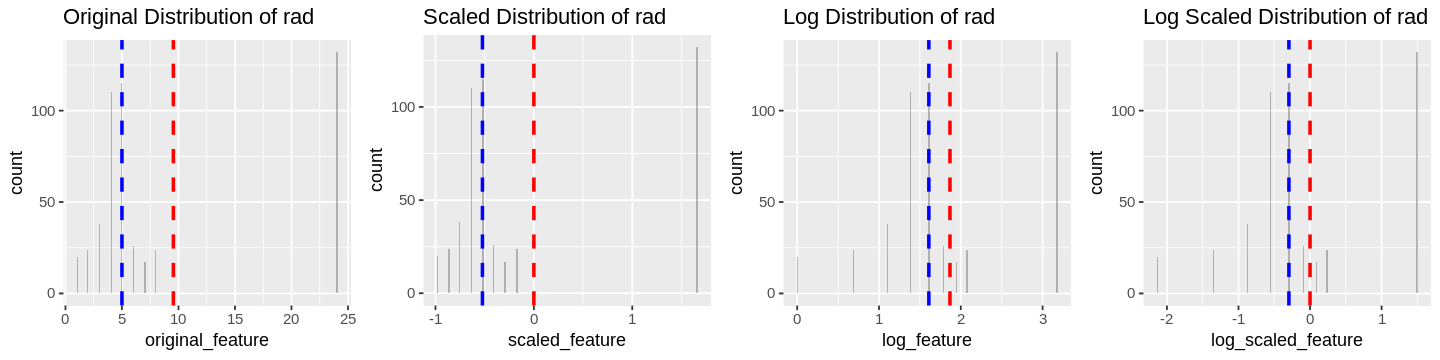

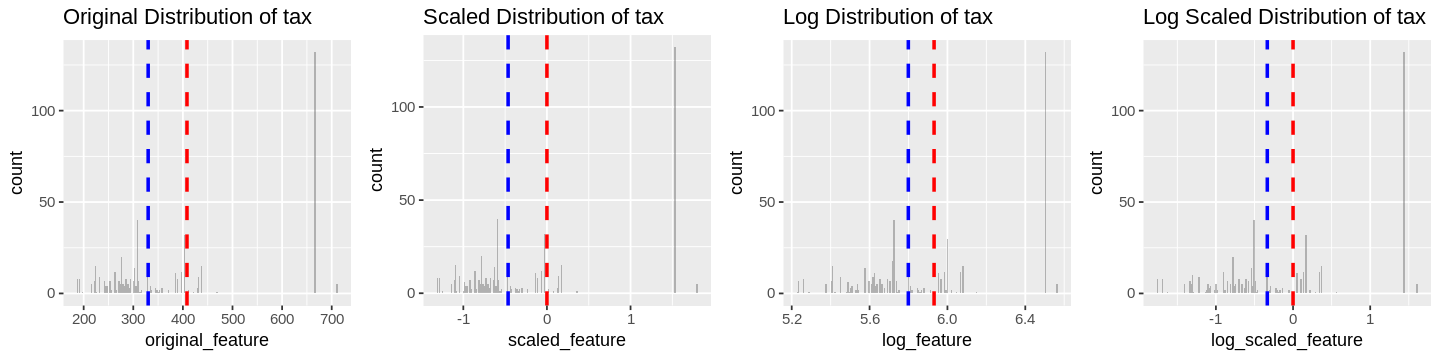

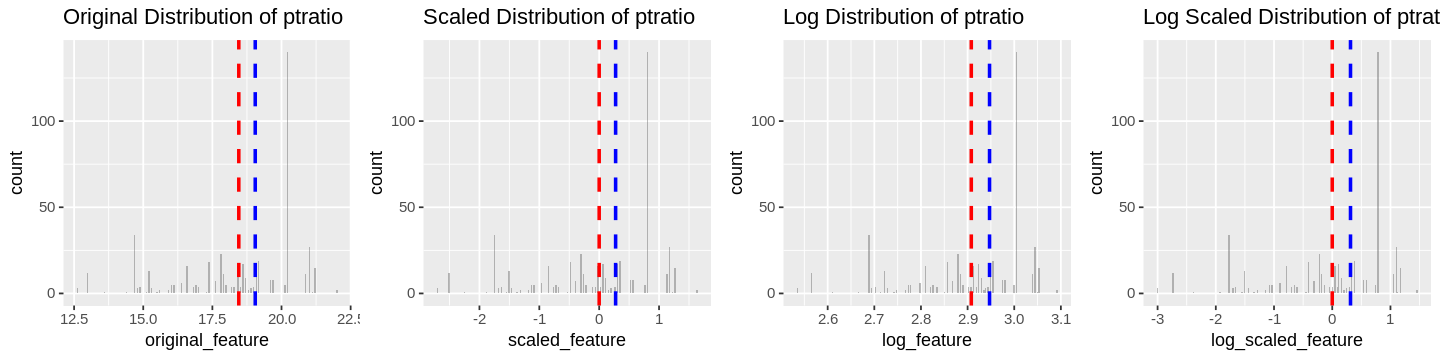

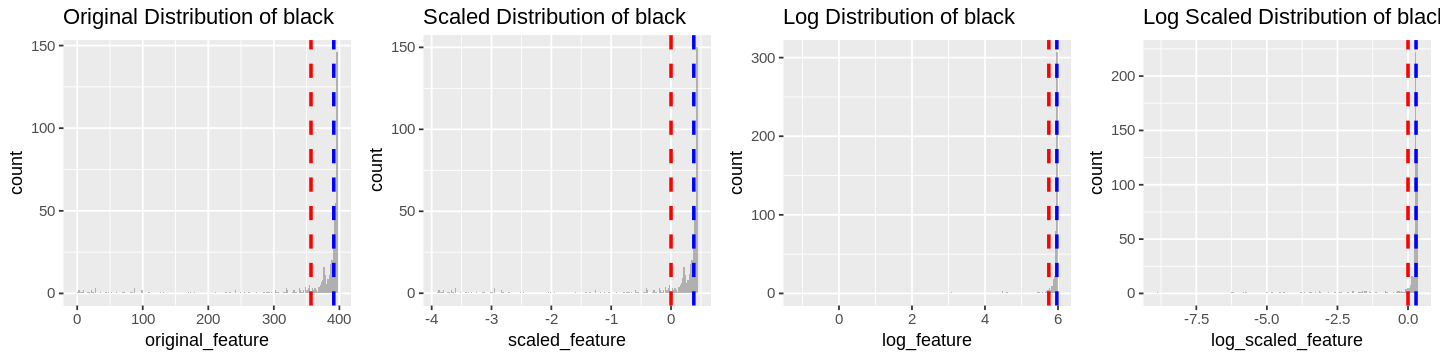

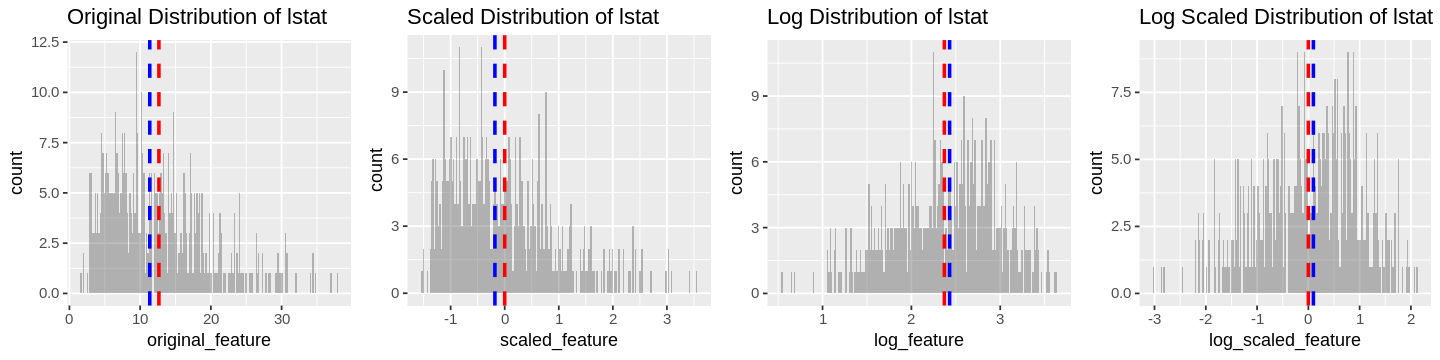

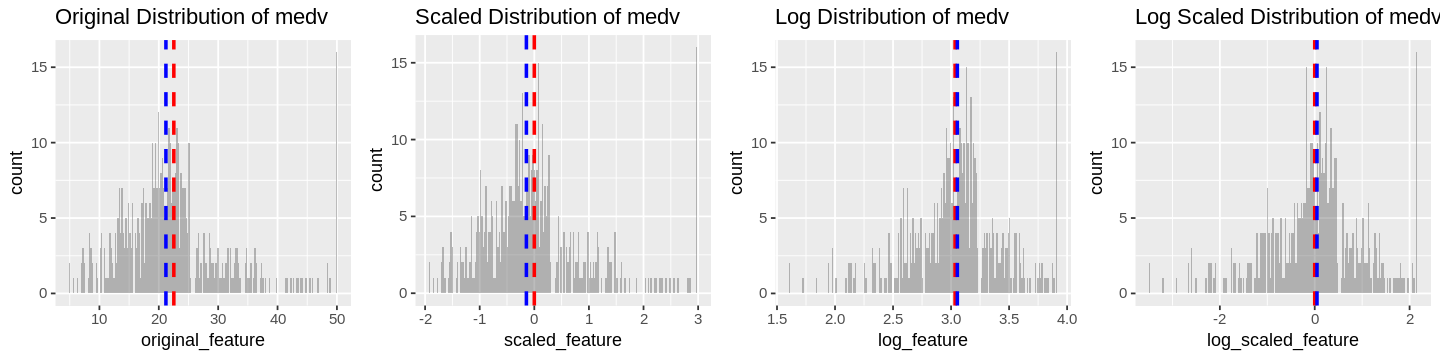

In [31]:
options(repr.plot.width=12, repr.plot.height=3) 
original_v_scaled_v_log('crim')
original_v_scaled_v_log('indus')
original_v_scaled_v_log('nox')
original_v_scaled_v_log('rm')
original_v_scaled_v_log('age')
original_v_scaled_v_log('dis')
original_v_scaled_v_log('rad')
original_v_scaled_v_log('tax')
original_v_scaled_v_log('ptratio')
original_v_scaled_v_log('black')
original_v_scaled_v_log('lstat')
original_v_scaled_v_log('medv')

As previously mentioned the standardization of the data moves the mean to 0. When applying the log transformation to the data we are diminishing the skew and then scaling again to set the mean to 0.